## Import All Necessary Packages

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Data Analysis & Preprocessing

In [97]:
df = pd.read_csv('./epi_r.csv')
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
for i in df.columns:
    print(i)

title
rating
calories
protein
fat
sodium
#cakeweek
#wasteless
22-minute meals
3-ingredient recipes
30 days of groceries
advance prep required
alabama
alaska
alcoholic
almond
amaretto
anchovy
anise
anniversary
anthony bourdain
aperitif
appetizer
apple
apple juice
apricot
arizona
artichoke
arugula
asian pear
asparagus
aspen
atlanta
australia
avocado
back to school
backyard bbq
bacon
bake
banana
barley
basil
bass
bastille day
bean
beef
beef rib
beef shank
beef tenderloin
beer
beet
bell pepper
berry
beverly hills
birthday
biscuit
bitters
blackberry
blender
blue cheese
blueberry
boil
bok choy
bon appétit
bon app��tit
boston
bourbon
braise
bran
brandy
bread
breadcrumbs
breakfast
brie
brine
brisket
broccoli
broccoli rabe
broil
brooklyn
brown rice
brownie
brunch
brussel sprout
buffalo
buffet
bulgaria
bulgur
burrito
butter
buttermilk
butternut squash
butterscotch/caramel
cabbage
cake
california
calvados
cambridge
campari
camping
canada
candy
candy thermometer
cantaloupe
capers
caraway
cardamom


In [99]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [101]:
def quick_summary(df):
    print("Missing Values (%):")
    print((df.isnull().sum() / len(df) * 100).round(2))

quick_summary(df)

Missing Values (%):
title          0.00
rating         0.00
calories      20.53
protein       20.76
fat           20.86
              ...  
cookbooks      0.00
leftovers      0.00
snack          0.00
snack week     0.00
turkey         0.00
Length: 680, dtype: float64


In [102]:
df = df.dropna()

In [103]:
(df.isnull().sum() / len(df) * 100).round(2)

title         0.0
rating        0.0
calories      0.0
protein       0.0
fat           0.0
             ... 
cookbooks     0.0
leftovers     0.0
snack         0.0
snack week    0.0
turkey        0.0
Length: 680, dtype: float64

In [104]:
df[['calories', 'protein', 'fat', 'sodium']].mean()

calories    6350.682993
protein      100.324571
fat          346.986826
sodium      6252.742310
dtype: float64

In [105]:
#% of recipes that are healthy
healthy_percentage = df['healthy'].mean() * 100
print(f"{healthy_percentage:.2f}% of recipes are healthy.")

7.97% of recipes are healthy.


In [106]:
#Average nutrients: healthy vs. unhealthy
df.groupby('healthy')[['calories', 'protein', 'fat', 'sodium']].mean()

,calories,protein,fat,sodium
healthy,,,,
0.0,6869.512534,107.47411,375.347055,6740.953082
1.0,357.873418,17.74288,19.408228,613.598892


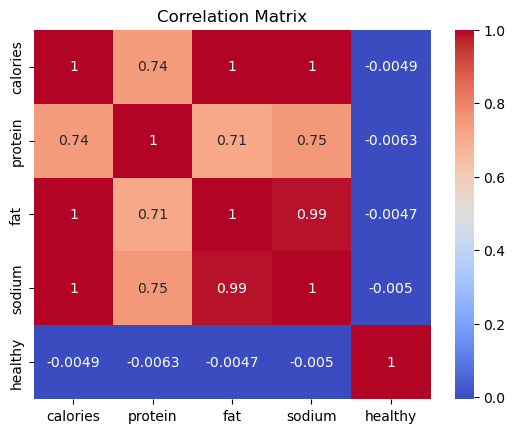

In [107]:
#Correlation between nutrients & healthy label
correlations = df[['calories', 'protein', 'fat', 'sodium', 'healthy']].corr()
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

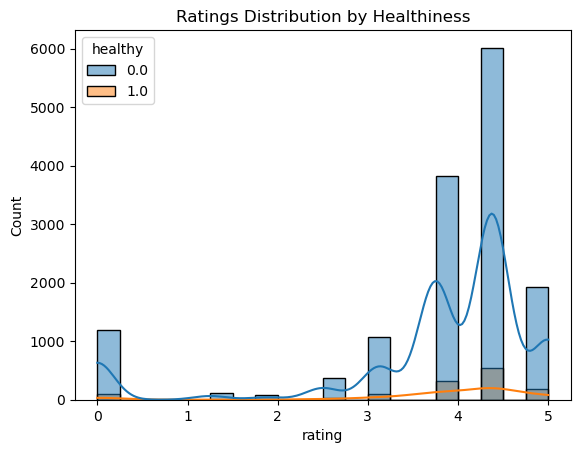

In [108]:
#rating distribution
sns.histplot(data=df, x='rating', hue='healthy', bins=20, kde=True)
plt.title("Ratings Distribution by Healthiness")
plt.show()

## Healthy Meal Classifier


In [110]:
df[['calories', 'protein', 'fat', 'sodium']].mean()

calories    6350.682993
protein      100.324571
fat          346.986826
sodium      6252.742310
dtype: float64

In [125]:
df = df.copy()

In [127]:
df.loc[:, "healthy"] = df["healthy"].astype(int)

In [129]:
df["healthy"]

0        0.0
1        0.0
2        0.0
4        0.0
5        0.0
        ... 
20047    0.0
20048    0.0
20049    0.0
20050    0.0
20051    0.0
Name: healthy, Length: 15864, dtype: float64

In [131]:
df[df["healthy"]==1.0][["title","calories","protein","fat","sodium", "healthy"]]

,title,calories,protein,fat,sodium,healthy
15,Raw Cream of Spinach Soup,382.0,5.0,31.0,977.0,1.0
27,Dried Pear Crisps,14.0,0.0,0.0,0.0,1.0
41,"Baked Halibut with Orzo, Spinach, and Cherry T...",634.0,44.0,31.0,181.0,1.0
82,Chicken in Green Pumpkin-Seed Sauce,682.0,36.0,57.0,909.0,1.0
91,Salmon with Chili-Mango Salsa,571.0,36.0,37.0,106.0,1.0
...,...,...,...,...,...,...
19936,"Radicchio, Grapefruit and Spinach Salad",220.0,2.0,19.0,115.0,1.0
19984,Noreen Kinney's Irish Soda Bread,1986.0,71.0,75.0,5753.0,1.0
19999,Curried Kumquat Chutney,170.0,1.0,1.0,14.0,1.0
20002,Prepared Horseradish,120.0,3.0,2.0,3339.0,1.0


In [133]:
# Select features (drop title, as it's text)
feature_cols = ["calories","protein","fat","sodium"]
X = df[feature_cols]
y = df["healthy"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_test.shape)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


(12691, 4) (3173,)
Accuracy: 0.9300346675070911
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      2922
         1.0       0.80      0.16      0.26       251

    accuracy                           0.93      3173
   macro avg       0.86      0.58      0.61      3173
weighted avg       0.92      0.93      0.91      3173



In [135]:
pred_x = X.iloc[0].values.reshape(1, -1)
print(pred_x)

[[426.  30.   7. 559.]]


In [147]:
pred_x_flat = np.array(pred_x).reshape(-1) 
pred_x_df = pd.DataFrame([pred_x_flat], columns=feature_cols)
print("Healthy prediction:", clf.predict(pred_x_df))

Healthy prediction: [0.]
